# Opgave

## Vi har skabet et værktøj som kan hjælpe dig med at finde den bedste Macbook til prisen vha. machine learning og web scraping. 

### Vi benytter disse data til at analysere det mest optimale køb på følgende måde:
- Vi bruger Normalisering og Plotting til at finde sammenhænge i data.
- Vi viser grafer over prisudvikling ved at fokuserer på skærm og ram.
- Vi ser på den samlede computer og ikke på de enkelte komponenter.
- Vi benytter linær regression til at forud hvad prisen bliver, hvis man justerer på hhv. skærm og ram.
- Vi benytter clusters til at dokumenterer sammenhængen mellem vores rå data og teorier.
- Vi benytter Machine learning til at finde den kategori som den søgte Macbook tilhører.
 - Vi finder rette kategori ved at se bort fra prisen.
 - Vi finder den Macbook kategori som passer bedste til behovet, udfra de søgte kriterier og indenfor kundens budget med +- et givent beløb.

In [3]:
from modules import eksamen_scrape
from modules import eksamen_table
from modules import eksamen_plot
from modules import eksamen_csv
from modules import eksamen_cluster
from modules import eksamen_class
from modules import eksamen_normalize
from modules import eksamen_linear_regression
from modules import eksamen_machine_learning

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [4]:
import imp

In [55]:
# Reload module
imp.reload(eksamen_scrape)
imp.reload(eksamen_table)
imp.reload(eksamen_plot)
imp.reload(eksamen_csv)
imp.reload(eksamen_cluster)
imp.reload(eksamen_class)
imp.reload(eksamen_normalize)
imp.reload(eksamen_linear_regression)
imp.reload(eksamen_machine_learning)

<module 'modules.eksamen_machine_learning' from '/Users/emilelkjaernielsen/Programming/Python/python_exam/Arik Python Project/modules/eksamen_machine_learning.py'>

In [14]:
# Reset CSV File
# eksamen_csv.create_csv_file('eksamen')

# Scrape

In [6]:
def scrape_computersalg(searchPhrase, isMac):
    # Scrape Computersalg.dk
    page_source = eksamen_scrape.computersalg_scrape(searchPhrase)
    
    # Get all tag elements
    all_tag_elements = eksamen_scrape.find_elements_computersalg(page_source)
    
    # Extract data of search and csv file
    all_search_dict_result, all_computer_to_add_to_csv = eksamen_scrape.extract_information_from_all_tags_computersalg(all_tag_elements)
    
    # Sort search dict
    sorted_all_search_dict_result_by_price = eksamen_scrape.sorted_all_search_dict_result_by_price(all_search_dict_result)

    if len(all_search_dict_result) > 3:
        # Get low, mid and high result 
        result = eksamen_scrape.get_low_mid_high_search_dict_result(sorted_all_search_dict_result_by_price)
        
    else:
        result = all_search_dict_result
    
    if isMac:
        # append result to csv file
        eksamen_csv.import_computer_data_to_csv_file(all_computer_to_add_to_csv)
    
    return result

In [7]:
def scrape_foniks(searchPhrase, isMac):
    # Scrape Føniks
    page_source = eksamen_scrape.foniks_scrape(searchPhrase)
    
    # Get all tag elements
    all_tag_elements = eksamen_scrape.find_elements_foniks(page_source)
    
    # Extract data of search and csv file
    all_search_dict_result, all_computer_to_add_to_csv = eksamen_scrape.extract_information_from_all_tags_foniks(all_tag_elements)
    
    # Sort search dict
    sorted_all_search_dict_result_by_price = eksamen_scrape.sorted_all_search_dict_result_by_price(all_search_dict_result)

    if len(all_search_dict_result) > 3:
        # Get low, mid and high result 
        result = eksamen_scrape.get_low_mid_high_search_dict_result(sorted_all_search_dict_result_by_price)
        
    else:
        result = all_search_dict_result
    
    if isMac:
        # append result to csv file
        eksamen_csv.import_computer_data_to_csv_file(all_computer_to_add_to_csv)
    
    return result

In [8]:
def start_scrape():
    
    # User input
    searchPhrase, computer_to_find, price_range, isMac = eksamen_scrape.search_input()
    
    print(searchPhrase)
    
    scrape_result_1 = scrape_foniks(searchPhrase, isMac)
    
    scrape_result_2 = scrape_computersalg(searchPhrase, isMac)
        
    result = eksamen_scrape.merge_scrape_results(scrape_result_1, scrape_result_2)
    
    eksamen_table.show_result_table(result)
    
    eksamen_plot.plot_result(result)
    
    if isMac:
        # Save computer_to_find
        eksamen_csv.create_csv_file('eksamen_computer_to_find')

        eksamen_csv.append_to_csv_file(computer_to_find, 'eksamen_computer_to_find', 'w')
    
    

Model: macbook pro
Number of Ram: 16
Size of SSD: 1
Screen size: 16
Target price: 12000
macbook pro 16 16 GB 1 TB


Title,Price,URL
"Apple MacBook Pro with Touch Bar - Core i5 2 GHz - macOS Big Sur 11.0 - 16 GB RAM - 512 GB SSD - 13.3"" IPS 2560 x 1600 (WQXGA) @ 60 Hz - Iris Plus Graphics - Wi-Fi 5, Bluetooth - space grey - kbd: dansk",14867 kr.,Gå til hjemmesiden
"Apple MacBook Pro - 16.2"" - M1 Pro - 16 GB RAM - 1 TB SSD - dansk",21547 kr.,Gå til hjemmesiden
"Apple MacBook Pro - 16.2"" - M1 Pro - 16 GB RAM - 1 TB SSD - UK",23104 kr.,Gå til hjemmesiden
"Apple MacBook Pro with Touch Bar - Core i9 2.3 GHz - macOS Big Sur 11.0 - 16 GB RAM - 1 TB SSD - 16"" IPS 3072 x 1920 @ 60 Hz - Radeon Pro 5500M / UHD Graphics 630 - Wi-Fi 5, Bluetooth - space grey - kbd: dansk",25029 kr.,Gå til hjemmesiden
"Apple MacBook Pro with Touch Bar - Core i9 2.3 GHz - macOS Big Sur 11.0 - 16 GB RAM - 1 TB SSD - 16"" IPS 3072 x 1920 @ 60 Hz - Radeon Pro 5500M / UHD Graphics 630 - Wi-Fi 5, Bluetooth - sølv - kbd: dansk",25029 kr.,Gå til hjemmesiden
"Apple MacBook Pro - 16.2"" - M1 Pro - 16 GB RAM - 8 TB SSD - dansk",42289 kr.,Gå til hjemmesiden


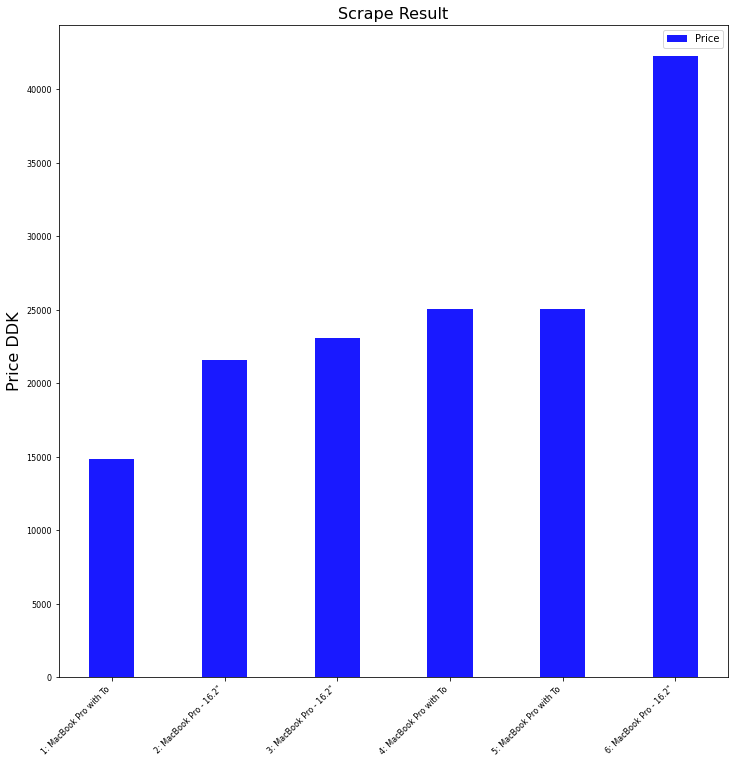

In [57]:
start_scrape()

# Full Scrape Data

In [58]:
full_scrape_data = eksamen_csv.return_csv_file_for_head_view('eksamen')

In [59]:
full_scrape_data

,Brand,Model,Cpu,Processor,Ram,SSD (TB),Screen,Price,Date,Url
0,Apple,MacBook Pro,Apple M1,M1 M1,8,1,13,14552.0,17-11-2021,https://www.fcomputer.dk/apple-macbook-pro-13-...
1,Apple,MacBook Pro,Apple M1,M1 M1,8,1,13,14552.0,17-11-2021,https://www.fcomputer.dk/apple-macbook-pro-13-...
2,Apple,MacBook Pro,Apple M1,M1 M1,16,1,13,16296.0,17-11-2021,https://www.fcomputer.dk/apple-macbook-pro-13-...
3,Apple,MacBook Pro,Apple M1,M1 M1,16,1,13,16296.0,17-11-2021,https://www.fcomputer.dk/apple-macbook-pro-13-...
4,Apple,MacBook Pro,Apple M1,M1 M1,16,2,13,19784.0,17-11-2021,https://www.fcomputer.dk/apple-macbook-pro-13-...
...,...,...,...,...,...,...,...,...,...,...
813,Apple,MacBook Pro,Apple M1,M1 11.0,16,1,13,16599.0,13-12-2021,https://www.computersalg.dk//i/7189434/apple-m...
814,Apple,MacBook Pro,Apple M1,M1 10.15,16,1,13,16666.0,13-12-2021,https://www.computersalg.dk//i/6168309/apple-m...
815,Apple,MacBook Pro,Apple M1,M1 11.0,16,1,16,25029.0,13-12-2021,https://www.computersalg.dk//i/5896846/apple-m...
816,Apple,MacBook Pro,Apple M1,M1 11.0,16,1,13,16666.0,13-12-2021,https://www.computersalg.dk//i/6168307/apple-m...


# Pairplot & normalization

  Processor  Ram SSD (TB)  Screen    Price
0     M1 M1    8        1      13  14552.0
1     M1 M1    8        1      13  14552.0
2     M1 M1   16        1      13  16296.0
3     M1 M1   16        1      13  16296.0
4     M1 M1   16        2      13  19784.0


     Processor  Ram SSD (TB)  Screen    Price
0            2    8        1      13  14552.0
1            2    8        1      13  14552.0
2            2   16        1      13  16296.0
3            2   16        1      13  16296.0
4            2   16        2      13  19784.0
..         ...  ...      ...     ...      ...
703          0   16        1      13  16666.0
704          1   16        1      16  25029.0
705          1   16        1      13  16666.0
706          1   16        1      13  16599.0
707          1   16      512      13  14867.0

[708 rows x 5 columns]
    Processor       Ram  SSD (TB)    Screen     Price
10        0.4  0.142857  0.001454  0.000000  0.218570
11        0.4  0.142857  0.001454  0.000000  0.218570
12

/Users/emilelkjaernielsen/Programming/Python/python_exam/Arik Python Project/modules/eksamen_normalize.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_data_sorted['Processor'] = label_enc.fit_transform(csv_data_sorted['Processor'].astype(str))


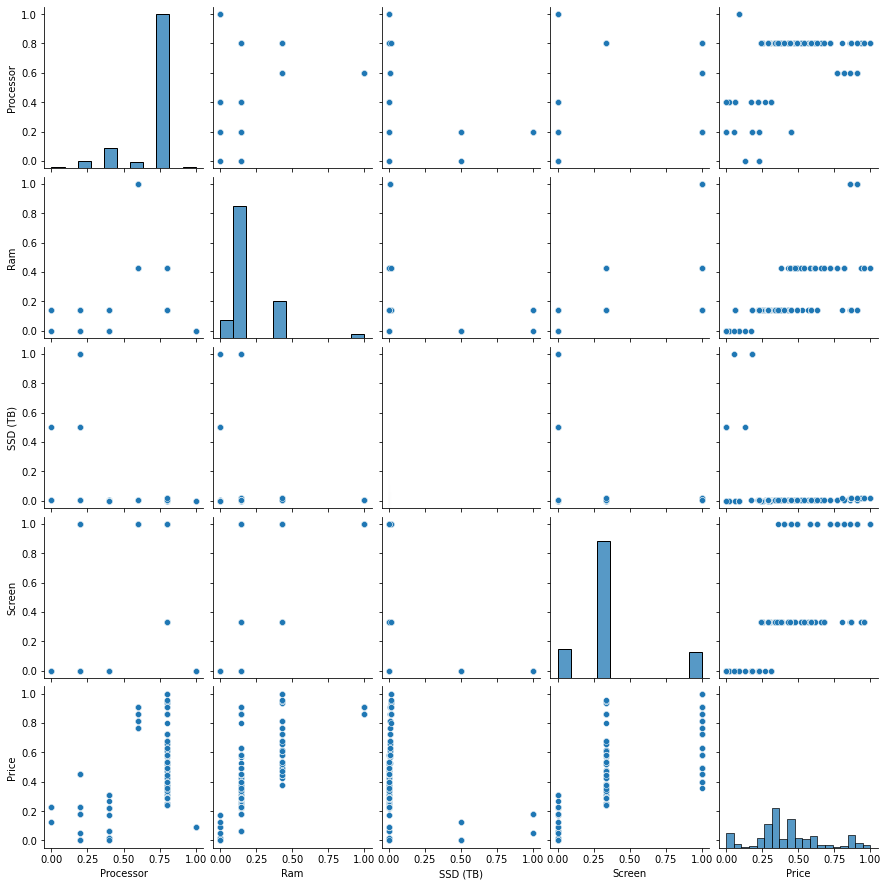

In [85]:
# filename, mode: all (default), screen_price, ram_price & quantile = True/False (default)
eksamen_normalize.pairplot_and_normalization('eksamen', 'all', True)

  Processor  Ram SSD (TB)  Screen    Price
0     M1 M1    8        1      13  14552.0
1     M1 M1    8        1      13  14552.0
2     M1 M1   16        1      13  16296.0
3     M1 M1   16        1      13  16296.0
4     M1 M1   16        2      13  19784.0


     Processor  Ram SSD (TB)  Screen    Price
0            2    8        1      13  14552.0
1            2    8        1      13  14552.0
2            2   16        1      13  16296.0
3            2   16        1      13  16296.0
4            2   16        2      13  19784.0
..         ...  ...      ...     ...      ...
703          0   16        1      13  16666.0
704          1   16        1      16  25029.0
705          1   16        1      13  16666.0
706          1   16        1      13  16599.0
707          1   16      512      13  14867.0

[708 rows x 5 columns]
    Processor       Ram  SSD (TB)    Screen     Price
10        0.4  0.142857  0.001454  0.000000  0.218570
11        0.4  0.142857  0.001454  0.000000  0.218570
12

/Users/emilelkjaernielsen/Programming/Python/python_exam/Arik Python Project/modules/eksamen_normalize.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_data_sorted['Processor'] = label_enc.fit_transform(csv_data_sorted['Processor'].astype(str))


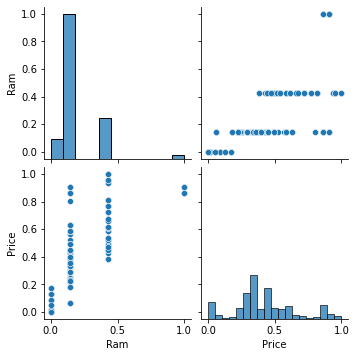

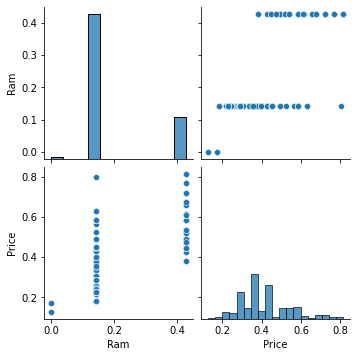

In [86]:
# filename, mode: all (default), screen_price, ram_price & quantile = True/False (default)
eksamen_normalize.pairplot_and_normalization('eksamen', 'ram_price', True)

# Plot

In [10]:
csv_data = eksamen_csv.return_csv_file_for_head_view('eksamen')

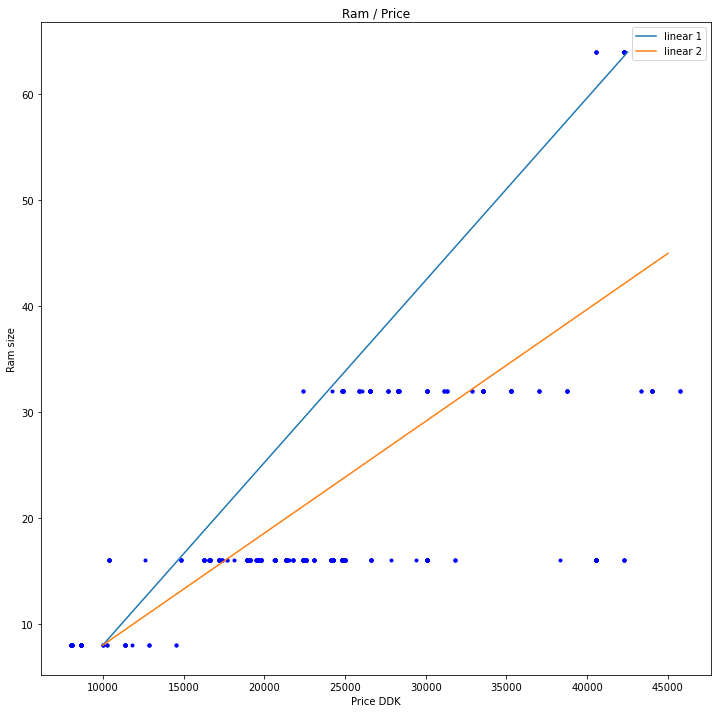

In [16]:
eksamen_plot.plot_price_ram(csv_data)

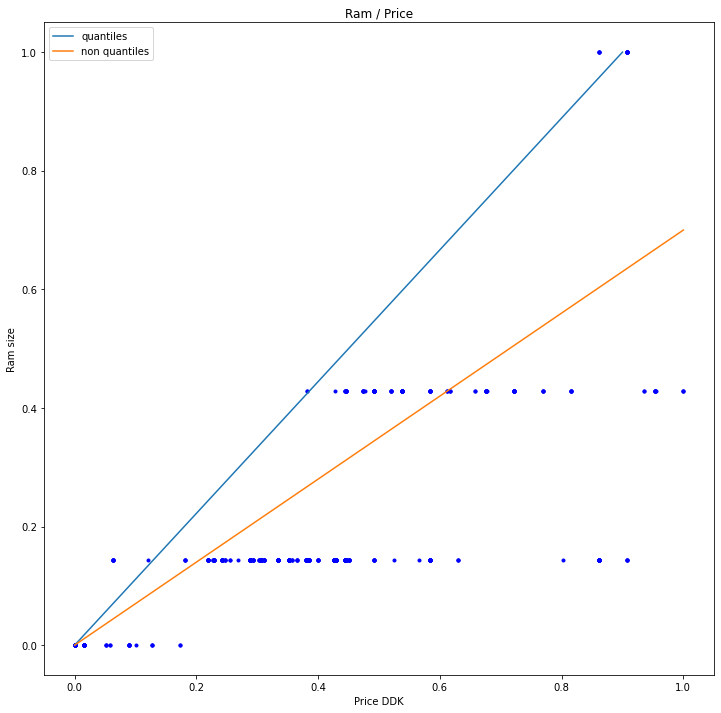

In [19]:
csv_data = eksamen_csv.return_csv_file_for_head_view('eksamen')
csv_data = csv_data[["Ram", "Price"]]
csv_data = eksamen_normalize.normalize_csv_data(csv_data)
eksamen_plot.plot_price_ram_normalize(csv_data)

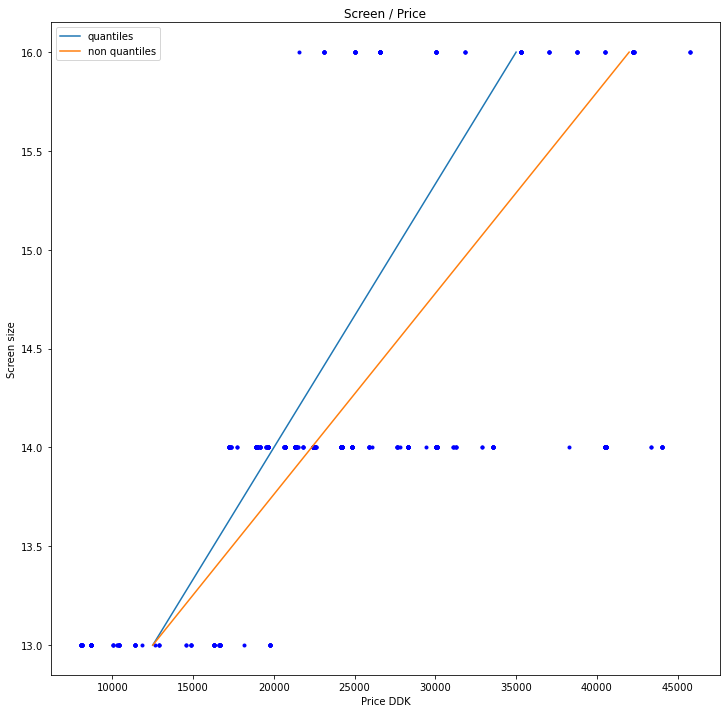

In [27]:
csv_data = eksamen_csv.return_csv_file_for_head_view('eksamen')
eksamen_plot.plot_price_screen(csv_data)

# Linear Regression

In [30]:
# a = y2 - y1 / x2 - x1
# non quantile
a = 37 / 35000
print(a)

0.0010571428571428572


In [32]:
# Filename (default: 'eksamen'), column_1 (default: 'Price'), column_2 (default: 'Ram')
eksamen_linear_regression.create_linear_regression('eksamen', 'Price', 'Ram')

     Brand        Model       Cpu Processor  Ram SSD (TB)  Screen     Price  \
0    Apple  MacBook Pro  Apple M1     M1 M1    8        1      13   14552.0   
1    Apple  MacBook Pro  Apple M1     M1 M1    8        1      13   14552.0   
2    Apple  MacBook Pro  Apple M1     M1 M1   16        1      13   16296.0   
3    Apple  MacBook Pro  Apple M1     M1 M1   16        1      13   16296.0   
4    Apple  MacBook Pro  Apple M1     M1 M1   16        2      13   19784.0   
..     ...          ...       ...       ...  ...      ...     ...       ...   
721  Apple  MacBook Air  Apple M1   M1 11.0    8      512      13   10026.0   
722  Apple  MacBook Air  Apple M1   M1 11.0    8      512      13   10269.0   
723  Apple  MacBook Air  Apple M1   M1 11.0    8      512      13  11831.64   
724  Apple  MacBook Air  Apple M1   M1 11.0    8      512      13   10269.0   
725  Apple  MacBook Air  Apple M1   M1 11.0   16      512      13   12621.0   

           Date                                    

In [33]:
# Filename (default: 'eksamen'), column_1 (default: 'Price'), column_2 (default: 'Ram')
eksamen_linear_regression.create_linear_regression('eksamen', 'Price', 'Screen')

     Brand        Model       Cpu Processor  Ram SSD (TB)  Screen     Price  \
0    Apple  MacBook Pro  Apple M1     M1 M1    8        1      13   14552.0   
1    Apple  MacBook Pro  Apple M1     M1 M1    8        1      13   14552.0   
2    Apple  MacBook Pro  Apple M1     M1 M1   16        1      13   16296.0   
3    Apple  MacBook Pro  Apple M1     M1 M1   16        1      13   16296.0   
4    Apple  MacBook Pro  Apple M1     M1 M1   16        2      13   19784.0   
..     ...          ...       ...       ...  ...      ...     ...       ...   
721  Apple  MacBook Air  Apple M1   M1 11.0    8      512      13   10026.0   
722  Apple  MacBook Air  Apple M1   M1 11.0    8      512      13   10269.0   
723  Apple  MacBook Air  Apple M1   M1 11.0    8      512      13  11831.64   
724  Apple  MacBook Air  Apple M1   M1 11.0    8      512      13   10269.0   
725  Apple  MacBook Air  Apple M1   M1 11.0   16      512      13   12621.0   

           Date                                    

# Cluster 2D

       Price  Ram
0    14552.0    8
1    14552.0    8
2    16296.0   16
3    16296.0   16
4    19784.0   16
..       ...  ...
703  16666.0   16
704  25029.0   16
705  16666.0   16
706  16599.0   16
707  14867.0   16

[708 rows x 2 columns]
[['14552.0' 8]
 ['14552.0' 8]
 ['16296.0' 16]
 ...
 ['16666.0' 16]
 ['16599.0' 16]
 ['14867.0' 16]]
[[14552     8]
 [14552     8]
 [16296    16]
 ...
 [16666    16]
 [16599    16]
 [14867    16]]
Number of estimated clusters : 3
[2.16983846e+04 1.75565611e+01]
[4.02145778e+04 2.86222222e+01]
[9.56535065e+03 9.14285714e+00]


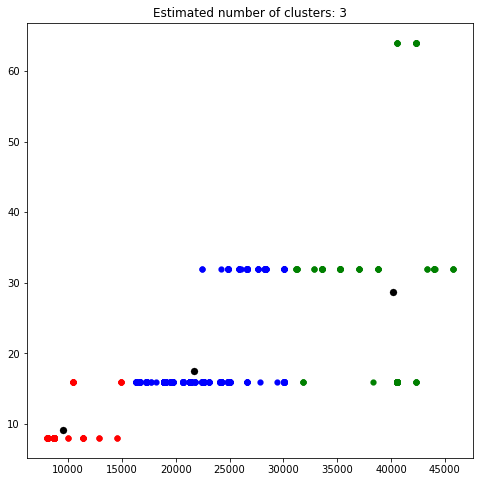

In [93]:
# filename, column_1 (default 'Price'), column_2 (Default 'Ram'), quantile = True/False (default)
eksamen_cluster.create_2d_cluster('eksamen', 'Price', 'Ram', False)

       Price  Screen
0    14552.0      13
1    14552.0      13
2    16296.0      13
3    16296.0      13
4    19784.0      13
..       ...     ...
703  16666.0      13
704  25029.0      16
705  16666.0      13
706  16599.0      13
707  14867.0      13

[708 rows x 2 columns]
[['14552.0' 13]
 ['14552.0' 13]
 ['16296.0' 13]
 ...
 ['16666.0' 13]
 ['16599.0' 13]
 ['14867.0' 13]]
[[14552    13]
 [14552    13]
 [16296    13]
 ...
 [16666    13]
 [16599    13]
 [14867    13]]
Number of estimated clusters : 3
[2.16983846e+04 1.41266968e+01]
[4.02145778e+04 1.48444444e+01]
[9565.35064935   13.        ]


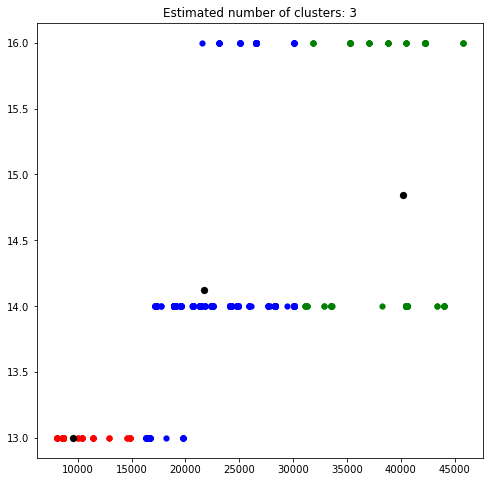

In [94]:
# filename, column_1 (default 'Price'), column_2 (Default 'Ram'), quantile = True/False (default)
eksamen_cluster.create_2d_cluster('eksamen', 'Price', 'Screen', False)

     Screen  Ram
0        13    8
1        13    8
2        13   16
3        13   16
4        13   16
..      ...  ...
703      13   16
704      16   16
705      13   16
706      13   16
707      13   16

[708 rows x 2 columns]
[[13  8]
 [13  8]
 [13 16]
 ...
 [13 16]
 [13 16]
 [13 16]]
Number of estimated clusters : 4
[14.03067485 16.        ]
[14.76258993 32.        ]
[13.  8.]
[16. 64.]


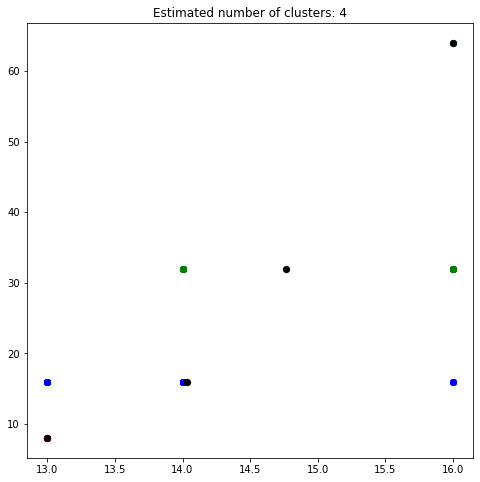

In [95]:
# filename, column_1 (default 'Price'), column_2 (Default 'Ram'), quantile = True/False (default)
eksamen_cluster.create_2d_cluster('eksamen', 'Screen', 'Ram', False)

       Price  Ram
0    14552.0    8
1    14552.0    8
2    16296.0   16
3    16296.0   16
4    19784.0   16
..       ...  ...
703  16666.0   16
704  25029.0   16
705  16666.0   16
706  16599.0   16
707  14867.0   16

[708 rows x 2 columns]
[['14552.0' 8]
 ['14552.0' 8]
 ['16296.0' 16]
 ...
 ['16666.0' 16]
 ['16599.0' 16]
 ['14867.0' 16]]
[[14552     8]
 [14552     8]
 [16296    16]
 ...
 [16666    16]
 [16599    16]
 [14867    16]]
Number of estimated clusters : 3
[2.17689576e+04 1.68063660e+01]
[4.09006962e+04 2.81518987e+01]
[9.12619718e+03 8.78873239e+00]


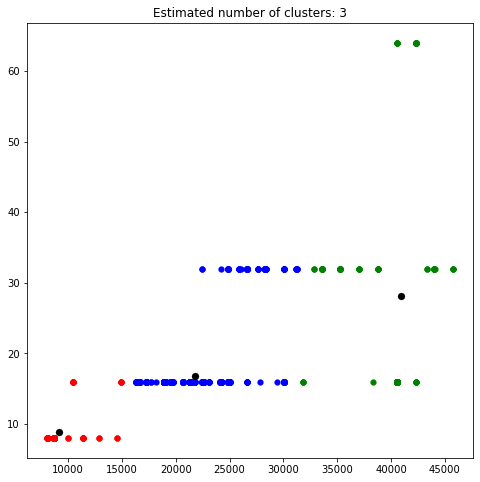

In [96]:
# filename, column_1 (default 'Price'), column_2 (Default 'Ram'), quantile = True/False (default)
eksamen_cluster.create_2d_cluster('eksamen', 'Price', 'Ram', True)

#### Quantile = True giver for mange clusters

# Cluster Multi Dimensional

In [97]:
def multi_dimensional_cluster():
    csv_data = eksamen_csv.return_csv_file_for_head_view('eksamen')
    print(csv_data)
    
    cluster_data = csv_data[["Processor", "Ram", "SSD (TB)", "Screen", "Price"]]
    print(cluster_data)
    
    cluster_data = eksamen_normalize.create_dummies(cluster_data, 'Processor')
    print(cluster_data)
    
    eksamen_cluster.create_multi_dimensional_cluster(cluster_data)

In [98]:
multi_dimensional_cluster()

     Brand        Model       Cpu Processor  Ram SSD (TB)  Screen    Price  \
0    Apple  MacBook Pro  Apple M1     M1 M1    8        1      13  14552.0   
1    Apple  MacBook Pro  Apple M1     M1 M1    8        1      13  14552.0   
2    Apple  MacBook Pro  Apple M1     M1 M1   16        1      13  16296.0   
3    Apple  MacBook Pro  Apple M1     M1 M1   16        1      13  16296.0   
4    Apple  MacBook Pro  Apple M1     M1 M1   16        2      13  19784.0   
..     ...          ...       ...       ...  ...      ...     ...      ...   
703  Apple  MacBook Pro  Apple M1  M1 10.15   16        1      13  16666.0   
704  Apple  MacBook Pro  Apple M1   M1 11.0   16        1      16  25029.0   
705  Apple  MacBook Pro  Apple M1   M1 11.0   16        1      13  16666.0   
706  Apple  MacBook Pro  Apple M1   M1 11.0   16        1      13  16599.0   
707  Apple  MacBook Pro  Apple M1   M1 11.0   16      512      13  14867.0   

           Date                                                

# Machine Learning

In [60]:
eksamen_machine_learning.compare_machine_learning_algorithms('eksamen')

Length of unique sets:  92


[['2' '5' '8' '256' '13' '1' '8666.0' 'Apple M1 M1 M1 13" 256 GB 8 GB']
 ['2' '6' '16' '4' '14' '1' '30080.0' 'Apple M1 M1 Pro 14" 4 TB 16 GB']
 ['2' '7' '32' '4' '16' '1' '37031.0' 'Apple M1 M1 Max 16" 4 TB 32 GB']
 ['2' '6' '16' '1' '14' '1' '24229.0' 'Apple M1 M1 Pro 14" 1 TB 16 GB']
 ['2' '6' '32' '4' '14' '1' '31121.0' 'Apple M1 M1 Pro 14" 4 TB 32 GB']
 ['2' '7' '64' '2' '16' '1' '35312.0' 'Apple M1 M1 Max 16" 2 TB 64 GB']
 ['2' '6' '16' '2' '14' '1' '22600.0' 'Apple M1 M1 Pro 14" 2 TB 16 GB']
 ['2' '6' '32' '4' '16' '1' '35287.0' 'Apple M1 M1 Pro 16" 4 TB 32 GB']
 ['2' '5' '16' '1' '13' '1' '16297.0' 'Apple M1 M1 M1 13" 1 TB 16 GB']
 ['2' '6' '32' '2' '14' '1' '25913.0' 'Apple M1 M1 Pro 14" 2 TB 32 GB']
 ['2' '6' '16' '2' '14' '1' '24169.0' 'Apple M1 M1 Pro 14" 2 TB 16 GB']
 ['2' '6' '16' '2' '14' '1' '24823.0' 'Apple M1 M1 Pro 14" 2 TB 16 GB']
 ['2' '6' '16' '8' '14' '1' '40519.0' 'Apple M1 M1 Pro 14" 8 TB 16 GB']
 ['2' '6' '32' '1' '16' '1' '26567.0

/Users/emilelkjaernielsen/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/emilelkjaernielsen/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/emilelkjaernielsen/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renami

In [62]:
# filename (default = 'eksamen'), computer_to_find (default = 'eksamen_computer_to_find'), budget +/-, algorithm (CART, SVM and KNN)
eksamen_machine_learning.execute_machine_learning('eksamen', 'eksamen_computer_to_find', 2000, 'CART')



[['Apple', 'macbook pro', 'Apple M1', 'M1 Max', '16', '1', '16', '12000.0', '13-12-2021', '']]


[2, 7, 16, 1, 16, 1, '12000.0', 'Apple M1 M1 Max 16" 1 TB 16 GB']
What we will us:
[2, 7, 16, 1, 16, 1]
Length of unique sets:  92


[['2' '5' '8' '256' '13' '1' '8666.0' 'Apple M1 M1 M1 13" 256 GB 8 GB']
 ['2' '6' '16' '4' '14' '1' '30080.0' 'Apple M1 M1 Pro 14" 4 TB 16 GB']
 ['2' '7' '32' '4' '16' '1' '37031.0' 'Apple M1 M1 Max 16" 4 TB 32 GB']
 ['2' '6' '16' '1' '14' '1' '24229.0' 'Apple M1 M1 Pro 14" 1 TB 16 GB']
 ['2' '6' '32' '4' '14' '1' '31121.0' 'Apple M1 M1 Pro 14" 4 TB 32 GB']
 ['2' '7' '64' '2' '16' '1' '35312.0' 'Apple M1 M1 Max 16" 2 TB 64 GB']
 ['2' '6' '16' '2' '14' '1' '22600.0' 'Apple M1 M1 Pro 14" 2 TB 16 GB']
 ['2' '6' '32' '4' '16' '1' '35287.0' 'Apple M1 M1 Pro 16" 4 TB 32 GB']
 ['2' '5' '16' '1' '13' '1' '16297.0' 'Apple M1 M1 M1 13" 1 TB 16 GB']
 ['2' '6' '32' '2' '14' '1' '25913.0' 'Apple M1 M1 Pro 14" 2 TB 32 GB']
 ['2' '6' '16' '2' '14' '1' '24169.0' 'Apple M1 M